## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [82]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as st

Populating the interactive namespace from numpy and matplotlib


In [83]:
df = pd.read_csv('data/human_body_temperature.csv')

In [84]:
df.head(10)
#a quick look at our data

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


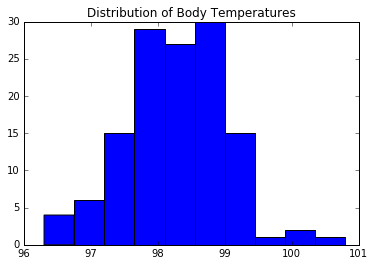

In [85]:
#EXERCISE 1
#we just need to take a look at the histogram of temperatures to check for normality
plt.hist(df.temperature)
plt.title("Distribution of Body Temperatures")
None

In [86]:
#EXERCISE 2
#For our one sample test, we need to check if we have sufficiently high n>30 to use the z distribution 
n = len(df)
n
#130>30 passes condition for z distribution
#The t distribution has wider tails than the z, making it more robust in predictions for small n samples
#However, this sample is sufficiently large to approximate probability using the z distribution

130

In [87]:
sm = mean(df.temperature)
sm

98.24923076923078

In [88]:
ssd = std(df.temperature)
ssd

0.7303577789050377

In [89]:
#Z test statistic is Z = (sample mean - pop mean) / (sample st.d./ sqrt(n)) 
d = sm - 98.6
Z = d/(ssd/sqrt(n))
Z

-5.4759252020781162

In [90]:
#Using scipy.stats, we can calculate the probability that Z is less than -5.48 
#Whether using a one-tailed or two-tailed test, this p-value indicates that we reject the null hypothesis that mean(temp) = 98.6
st.norm.cdf(Z)
#ANSWER TO QUESTION 2
#We are fairly confident that the true mean temperature is not 98.6

2.1761575829410943e-08

In [91]:
#QUESTION 3
#Construct 95% Confidence Interval for Temperature
SE = ssd/sqrt(n)
ME = 1.96*SE 
LL = sm-ME
UL = sm+ME
pd.DataFrame([LL, UL], columns=["95% Confidence Interval for Temperature"],index=["Lower Limit", "Upper Limit"])

,95% Confidence Interval for Temperature
Lower Limit,98.123680
Upper Limit,98.374782


In [92]:
#Based on the confidence interval computed above, an abnormal body temperature would be one 
#ABOVE 98.375 degrees or BELOW 98.124 degrees

In [100]:
#QUESTION 4
#Two sample hypothesis test, split by males and females
Male = df[df.gender != "F"]
Female = df[df.gender != "M"]
#with two samples, now we just need to calculate sample means and s.d.
Msm = mean(Male.temperature)
Msd = std(Male.temperature)
Mn = len(Male)
Fsm = mean(Female.temperature)
Fsd = std(Female.temperature)
Fn = len(Female)
#With all the elements, we just need to plug in to the two sample z test formula
Z = (Msm - Fsm)/(sqrt(Msd**2/sqrt(Mn) + Fsd**2/sqrt(Fn)))
Z

-0.81116114289386165

In [109]:
st.norm.cdf(Z)
#Because our p-value is .21>.05, we fail to reject the null hypothesis that male body temperature is different from female body temperature
#ANSWER TO QUESTION 4

0.20863656846028439